In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_df= pd.read_csv('train.csv')       
features_df = pd.read_csv('features.csv') 
stores_df = pd.read_csv('stores.csv')     


In [8]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [9]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## EDA

In [11]:
train_df.info()
train_df.describe()
train_df['Store'].value_counts()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])
print(train_df['Date'].head())
print(features_df['Date'].head())

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]


## Merge()

In [16]:
combined_df = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')
combined_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [18]:
full_df = pd.merge(combined_df, stores_df, on='Store', how='left')
full_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [24]:
full_df.info()
full_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [21]:
full_df['Store'].value_counts().head()
full_df['Dept'].value_counts().head()
full_df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

# Groupby aggragtion 

In [23]:
#Total sales by store:
store_sales = full_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [25]:
#Average sales by department:
dept_sales = full_df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)
dept_sales

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
          ...     
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554
Name: Weekly_Sales, Length: 81, dtype: float64

In [26]:
#Weekly sales over time (for trend analysis):
weekly_sales = full_df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

## Simulate two parts (for weeks)

In [28]:

part1 = full_df[full_df['Date'] < '2011-01-01']

part1


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421470,45,98,2010-12-03,349.38,False,40.93,3.046,NaN,NaN,NaN,NaN,NaN,182.667615,8.724,False,B,118221
421471,45,98,2010-12-10,665.96,False,30.54,3.109,NaN,NaN,NaN,NaN,NaN,182.551954,8.724,False,B,118221
421472,45,98,2010-12-17,222.48,False,30.51,3.140,NaN,NaN,NaN,NaN,NaN,182.517732,8.724,False,B,118221
421473,45,98,2010-12-24,222.48,False,30.59,3.141,NaN,NaN,NaN,NaN,NaN,182.544590,8.724,False,B,118221


In [29]:
part2 = full_df[full_df['Date'] >= '2011-01-01']
part2

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
48,1,1,2011-01-07,15984.24,False,48.27,2.976,NaN,NaN,NaN,NaN,NaN,211.404742,7.742,False,A,151315
49,1,1,2011-01-14,17359.70,False,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,7.742,False,A,151315
50,1,1,2011-01-21,17341.47,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False,A,151315
51,1,1,2011-01-28,18461.18,False,43.83,3.010,NaN,NaN,NaN,NaN,NaN,212.197058,7.742,False,A,151315
52,1,1,2011-02-04,21665.76,False,42.27,2.989,NaN,NaN,NaN,NaN,NaN,212.566881,7.742,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


# Concatenating: Appending data from different weeks
part1 , part2

In [30]:
concatenated_df = pd.concat([part1, part2], axis=0)
concatenated_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


# filtering by store

In [33]:


full_df[full_df['Store'] == 10]


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
87524,10,1,2010-02-05,40212.84,False,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
87525,10,1,2010-02-12,67699.32,True,49.96,2.828,NaN,NaN,NaN,NaN,NaN,126.496258,9.765,True,B,126512
87526,10,1,2010-02-19,49748.33,False,58.22,2.915,NaN,NaN,NaN,NaN,NaN,126.526286,9.765,False,B,126512
87527,10,1,2010-02-26,33601.22,False,52.77,2.825,NaN,NaN,NaN,NaN,NaN,126.552286,9.765,False,B,126512
87528,10,1,2010-03-05,36572.44,False,55.92,2.877,NaN,NaN,NaN,NaN,NaN,126.578286,9.765,False,B,126512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,10,98,2012-09-28,22.34,False,82.52,3.966,6091.96,62.82,2.82,3350.88,1751.75,131.043000,7.170,False,B,126512
97835,10,98,2012-10-05,789.38,False,80.88,4.132,8975.95,NaN,46.24,9546.75,7186.77,131.075667,6.943,False,B,126512
97836,10,98,2012-10-12,477.24,False,76.03,4.468,2674.51,NaN,10.32,1390.15,8116.13,131.108333,6.943,False,B,126512
97837,10,98,2012-10-19,578.46,False,72.71,4.449,3067.64,NaN,53.60,967.02,2705.58,131.149968,6.943,False,B,126512


# filtering by Specific department

In [32]:

full_df[full_df['Dept'] == 20]


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
2544,1,20,2010-02-05,5034.10,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2545,1,20,2010-02-12,3697.70,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2546,1,20,2010-02-19,4719.89,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
2547,1,20,2010-02-26,4007.94,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
2548,1,20,2010-03-05,4215.67,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414625,45,20,2012-09-28,3722.72,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
414626,45,20,2012-10-05,3512.27,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
414627,45,20,2012-10-12,3298.95,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
414628,45,20,2012-10-19,4060.30,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


# filtering by condition IsHoliday_x

In [37]:
full_df[full_df['IsHoliday_x'] == True]


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
31,1,1,2010-09-10,18194.74,True,78.69,2.565,NaN,NaN,NaN,NaN,NaN,211.495190,7.787,True,A,151315
42,1,1,2010-11-26,18820.29,True,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,True,A,151315
47,1,1,2010-12-31,19124.58,True,48.43,2.943,NaN,NaN,NaN,NaN,NaN,211.404932,7.838,True,A,151315
53,1,1,2011-02-11,37887.17,True,36.39,3.022,NaN,NaN,NaN,NaN,NaN,212.936705,7.742,True,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421510,45,98,2011-09-09,1092.66,True,71.48,3.738,NaN,NaN,NaN,NaN,NaN,186.673738,8.625,True,B,118221
421521,45,98,2011-11-25,794.62,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,True,B,118221
421526,45,98,2011-12-30,553.21,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,True,B,118221
421532,45,98,2012-02-10,770.86,True,37.00,3.640,15760.30,6113.95,5.43,5656.35,4685.58,189.707605,8.424,True,B,118221


# Plotting 

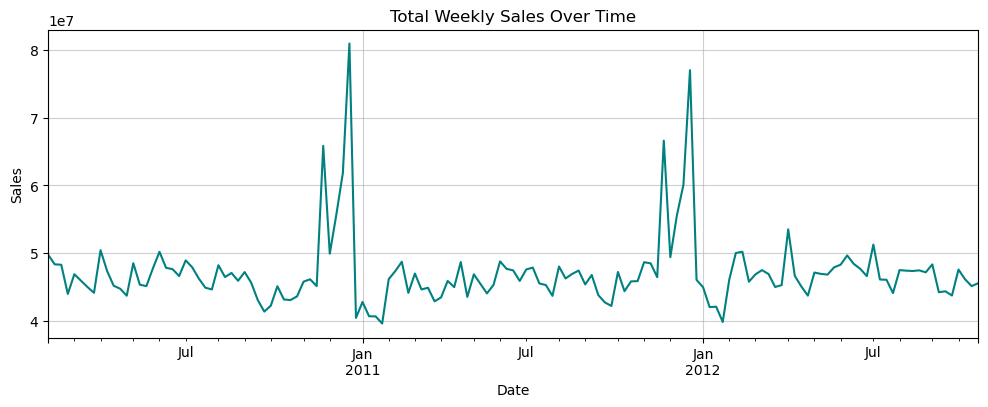

In [40]:
weekly_sales.plot(figsize=(12,4), title='Total Weekly Sales Over Time', color='teal')
plt.ylabel('Sales')
plt.grid((True), alpha=0.6)
plt.show()

# Bar chart : between Total sales vs store (catgorical data)

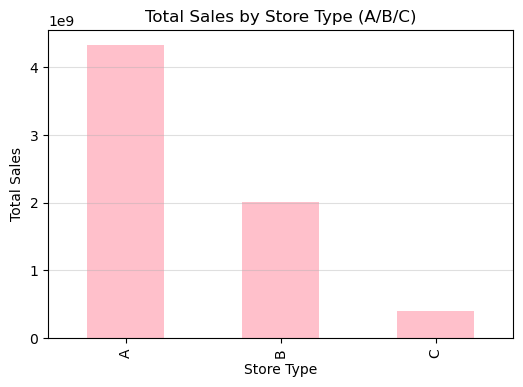

In [43]:
store_type_sales = full_df.groupby('Type')['Weekly_Sales'].sum()

store_type_sales.plot(kind='bar', color='pink', figsize=(6, 4))
plt.title('Total Sales by Store Type (A/B/C)')
plt.ylabel('Total Sales')
plt.xlabel('Store Type')
plt.grid(axis='y', alpha=0.4)
plt.show()

# Interpretation:

"Store Type A generates the highest total sales, suggesting it serves more customers or has more departments."

## Histogram: Distribution of Weekly Sales

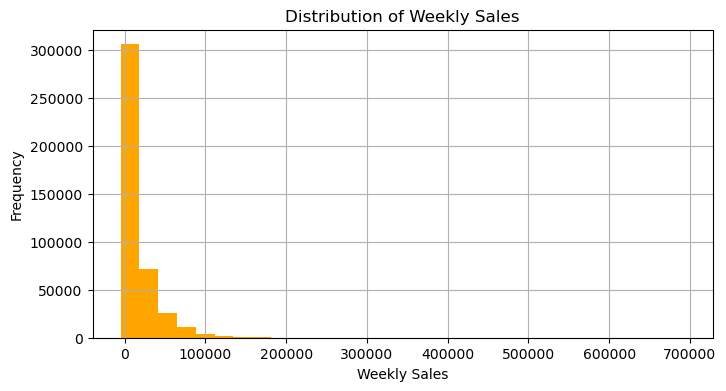

In [45]:
plt.figure(figsize=(8, 4))
full_df['Weekly_Sales'].hist(bins=30, color='orange')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Interpretation:

“The histogram is right-skewed — most departments have low weekly sales, with a few outliers having very high sales.”

“Most weekly sales fall between 0 and 10,000. This is the most common sales range for stores.”

## Boxplot : Weekly Sales Distribution by Store Type (A, B, C)

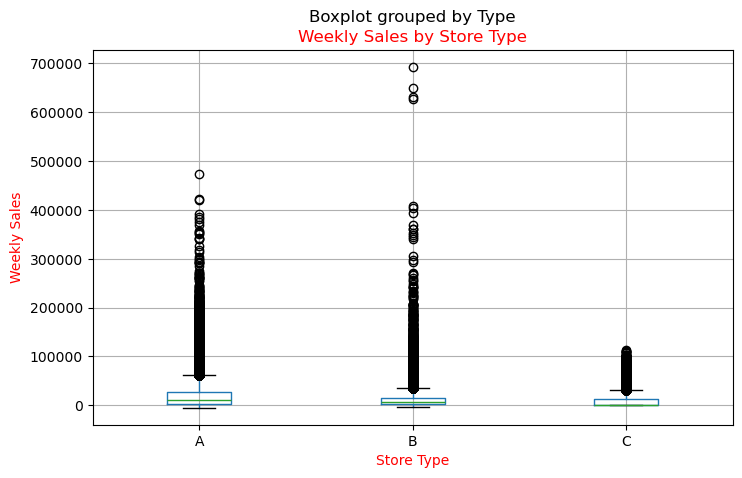

In [54]:
full_df.boxplot(column='Weekly_Sales', by='Type', figsize=(8, 5))
plt.title('Weekly Sales by Store Type', color='red')
plt.xlabel('Store Type', color='red')
plt.ylabel('Weekly Sales', color='red')
plt.grid(True)
plt.show()

## Explanation of boxplot :

*Too many outliers = frequent unusual sales weeks

*Common in large stores or holiday periods

*Indicates high variability in sales data

## Scatter plot : Store Size vs Weekly Sales

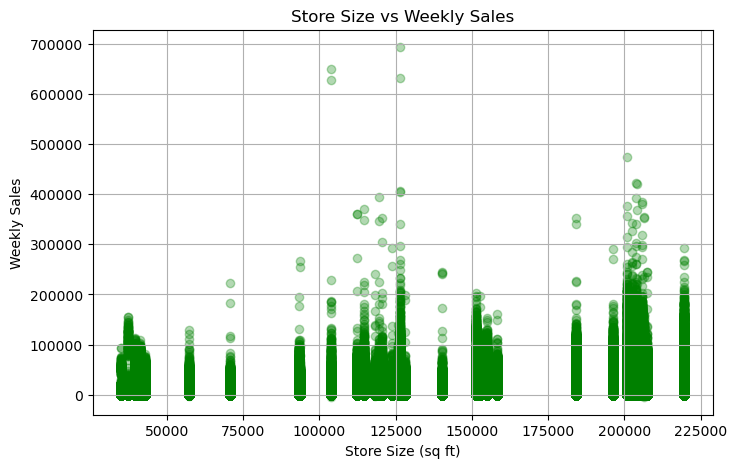

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(full_df['Size'], full_df['Weekly_Sales'], alpha=0.3, color='green')
plt.title('Store Size vs Weekly Sales')
plt.xlabel('Store Size (sq ft)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

## The scatter plot explanation:
it shows a positive but weak relationship between store size and weekly sales. While larger stores generally tend to sell more, there are many small stores with high sales and large stores with low sales. This suggests that other factors, such as location or store type, also play an important role.
## No correlation :
data sepreaded randomly 